In [1]:
import os   #used for directory work
import matplotlib.patches as mpatches #used for plot legends
import matplotlib.pyplot as plt   #used for creating plots
import pandas as pd
import numpy as np

In [4]:
def plotting(path,burn,seperator = " "):

    txt_files=[]
    all_files = os.listdir(path) #tells what directory the files are in
    for i in all_files: #reading only the .txt files 
        if i[-4:] == ".txt":
            txt_files.append(i)
    txt_files.sort() #alphabetizes them


    temp_sub = [1,2,3,4,13,14,15,16,25,26,27,28,37,38,39,40]
    wind_sub = [5,6,7,8,17,18,19,20,29,30,31,32,41,42,43,44]

    blue_patch = mpatches.Patch(color='blue', label='U')
    gree_patch = mpatches.Patch(color='green', label='V')
    blac_patch = mpatches.Patch(color='k', label='W')
    red_patch  = mpatches.Patch(color='red', label='Temperature')


    plt.figure(figsize=(26,30))
    for i in range(16):
        df = pd.read_csv(path + txt_files[i],na_values = ['NAN',"00nan"], sep=seperator)
        time_s = []
        for t in range(len(df)):
            time_s.append(round((float(df["Hr"][t]))*3600+float(df["Min"][t])*60 + float(df["Sec"][t])\
                          -((float(df["Hr"][0]))*3600+float(df["Min"][0])*60 + float(df["Sec"][0])),4))
        
        
        temp_ax = plt.subplot(11,4,temp_sub[i])
        temp_ax.set_title(txt_files[i][:2],fontsize = 20)
        temp_ax.plot(time_s,df["T"], c = "r", linewidth = .3)
       
        temp_ax.set_xlim(0,np.max(time_s[-1]))
        temp_ax.tick_params(labelbottom=False,bottom=False,)
        temp_ax.set_ylim(0, 80)
        temp_ax.grid()
        if (i+1)%4==0:
            temp_ax.set_ylabel(r"$^{\circ}C$",rotation=0, labelpad=10,fontsize= 20)
            temp_ax.yaxis.set_label_position("right")

        wind_ax = plt.subplot(11,4,wind_sub[i])
        wind_ax.plot(time_s, [float(i) for i in list(df["U"])], c = "b", linewidth=.05)
        wind_ax.plot(time_s, [float(i) for i in list(df["V"])], c = "g", linewidth = .05)
        wind_ax.plot(time_s, [float(i) for i in list(df["W"])], c = "k", linewidth = .05)
    
        wind_ax.set_xlim(0,np.max(time_s[-1]))
        wind_ax.set_ylim(-7.5,7.5)
        wind_ax.grid()
        #wind_ax.spines['top'].set_visible(False)

        wind_ax.set_xlabel("time (s)", fontsize = 18)

        if (i+1)%4==0:
            wind_ax.set_ylabel(r"$\frac{m}{s}$",rotation=0, labelpad=10,fontsize= 25)
            wind_ax.yaxis.set_label_position("right")

        if i%4 ==0:

            plt.legend( handles=[red_patch,blue_patch,gree_patch,blac_patch],bbox_to_anchor=(3, -0.35), ncol=4, fontsize = "xx-large")
            
    plt.subplots_adjust(hspace=0.1,wspace=.1)
    fmt ="Burn {} ({:02d}-{:02d}-{})"
    plt.suptitle(fmt.format(burn,df["MM"][0],df["DD"][0],df["YYYY"][0]), fontsize = 30,x=0.5, y=0.91)
    
    plt.savefig("Burn_"+burn+"_UVWT_Grid.png",dpi=400)

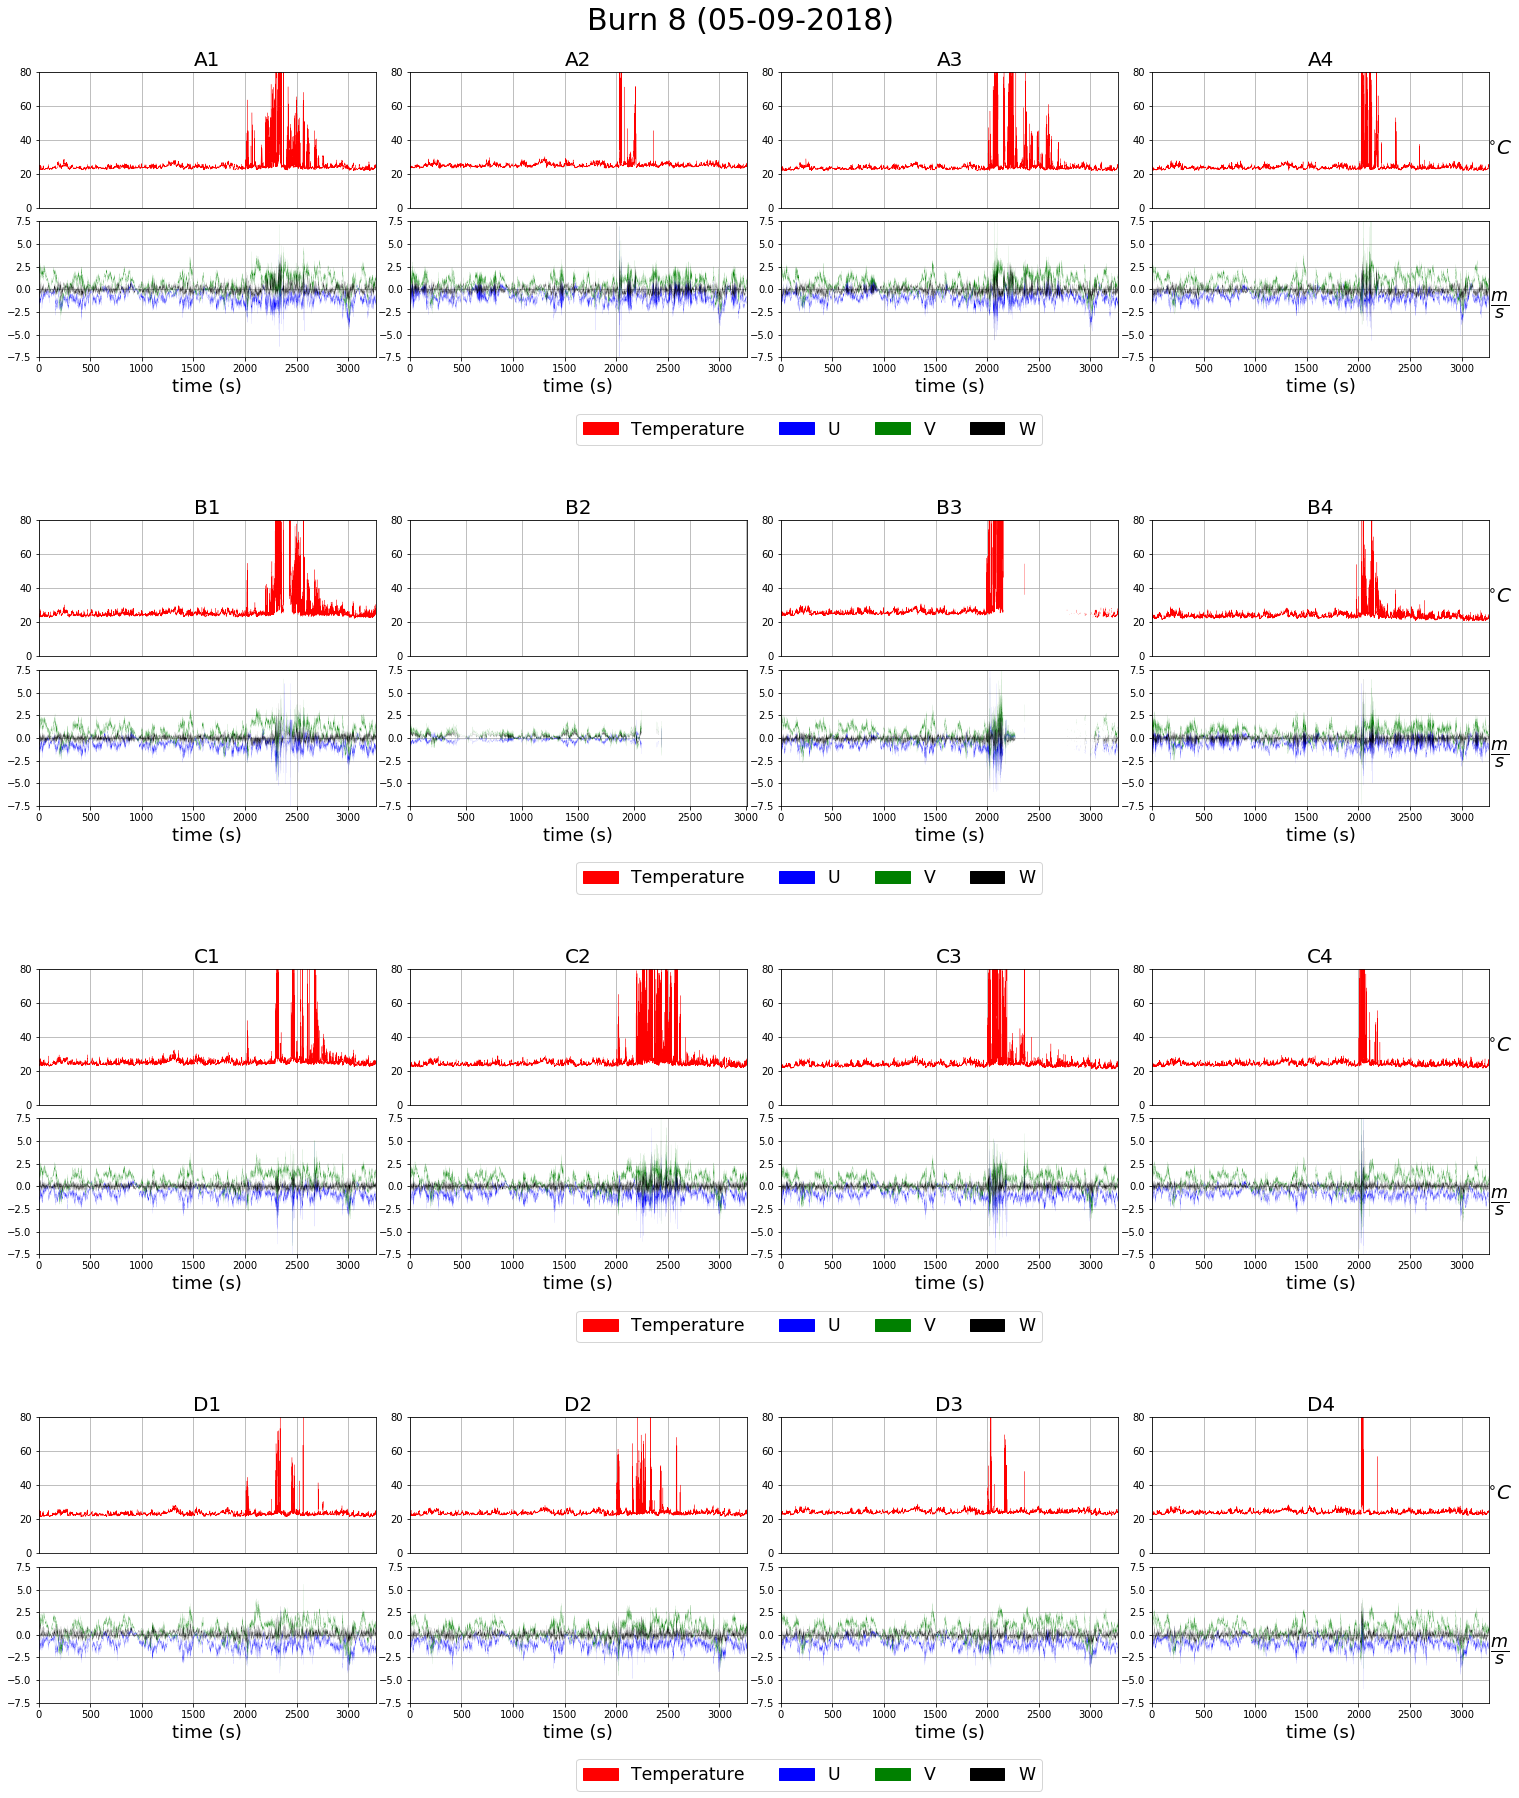

In [5]:
#m_path = '/Users/joeyp/Desktop/Forestry/File_Clean_Up/10X10_Truss_Burns_May_2018/Burn-'
path= "/home/joey/Desktop/10X10_Truss_SERDP_Burns_May_2018/JS_Cleaned_Data/Burn-"
pat ='/sonics/'
#plotting(path+"1"+pat, "1")
#for i in range(1,9):
#    plotting(path+str(i)+pat,str(i))
plotting(path+str(8)+pat,str(8),"\t")

KeyError: 'Hr'

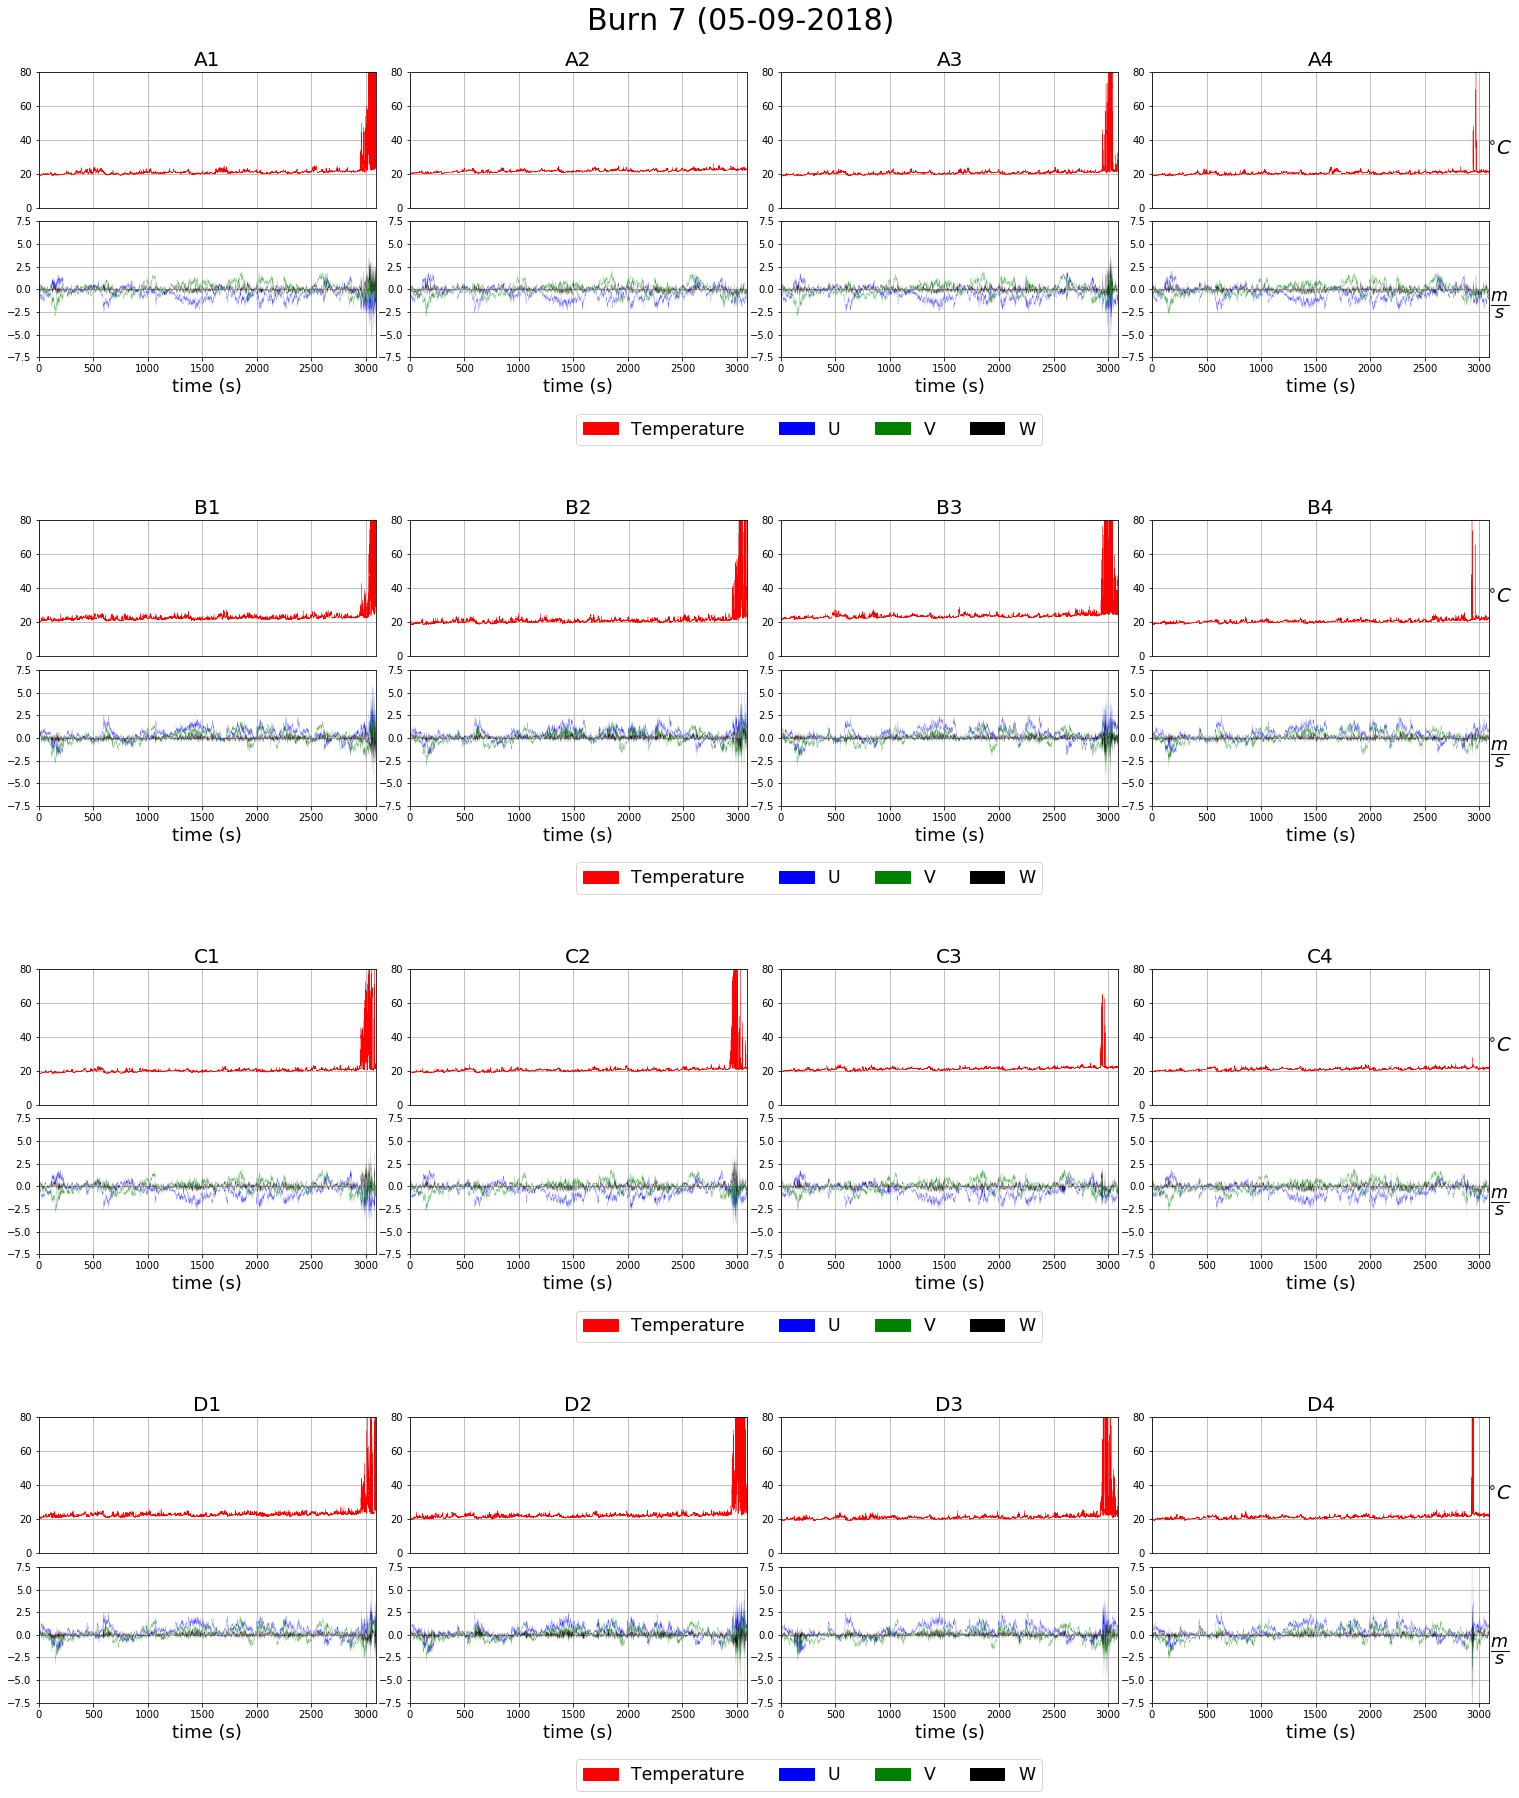

<Figure size 1872x2160 with 0 Axes>

In [6]:
#m_path = '/Users/joeyp/Desktop/Forestry/File_Clean_Up/10X10_Truss_Burns_May_2018/Burn-'
path= "/home/joey/Desktop/10X10_Truss_SERDP_Burns_May_2018/JS_Cleaned_Data/Burn-"
pat ='/sonics/'
#plotting(path+"1"+pat, "1")
for i in range(7,9):
    plotting(path+str(i)+pat,str(i))

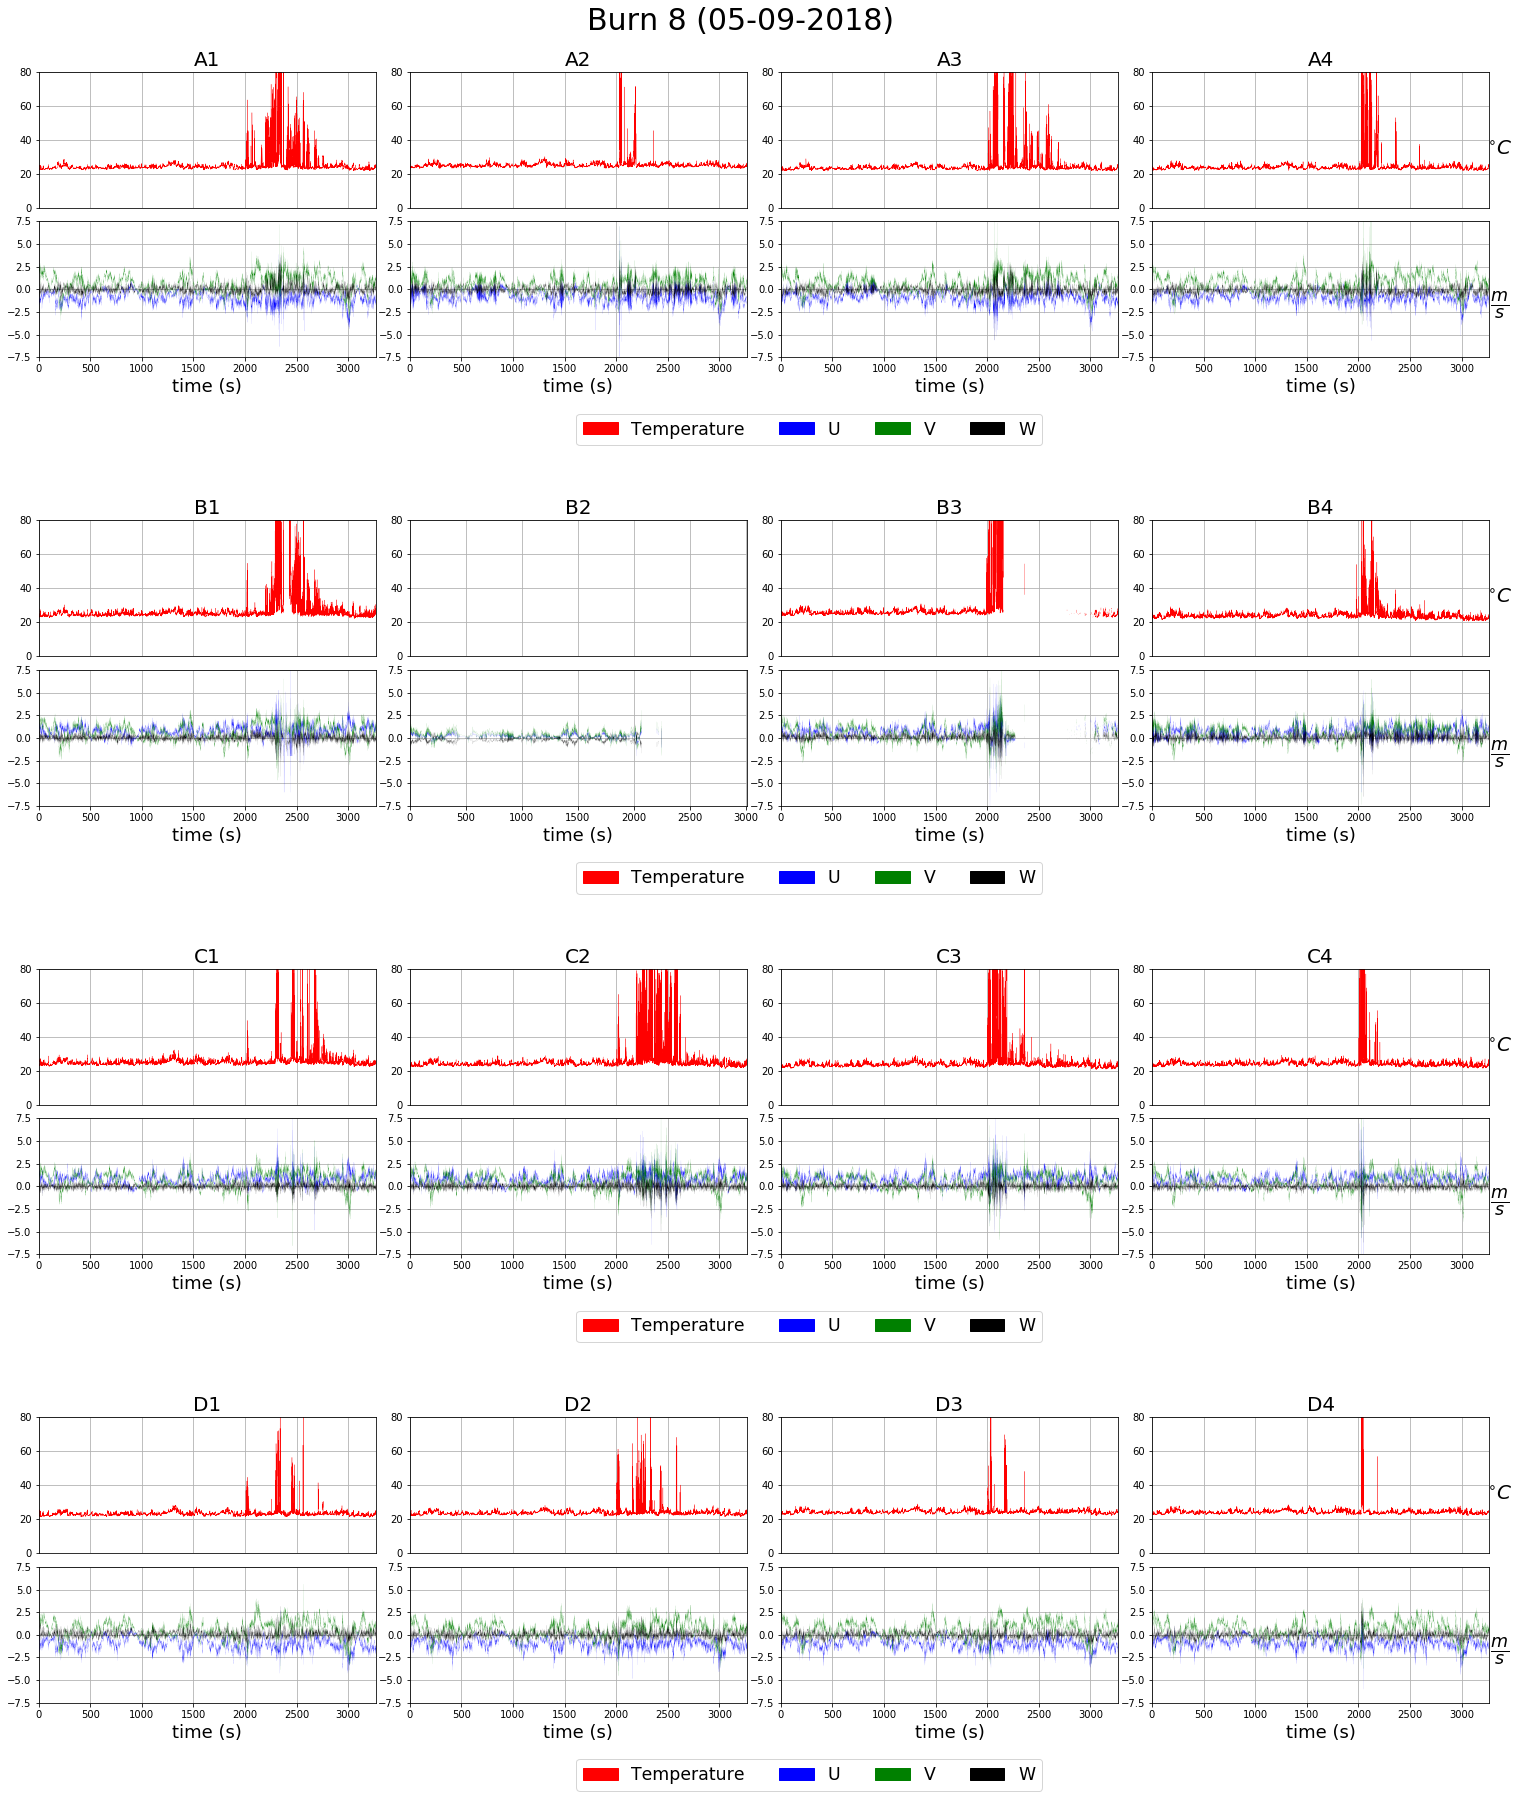

In [13]:
plotting(path+str(8)+pat,str(8))

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:65: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.


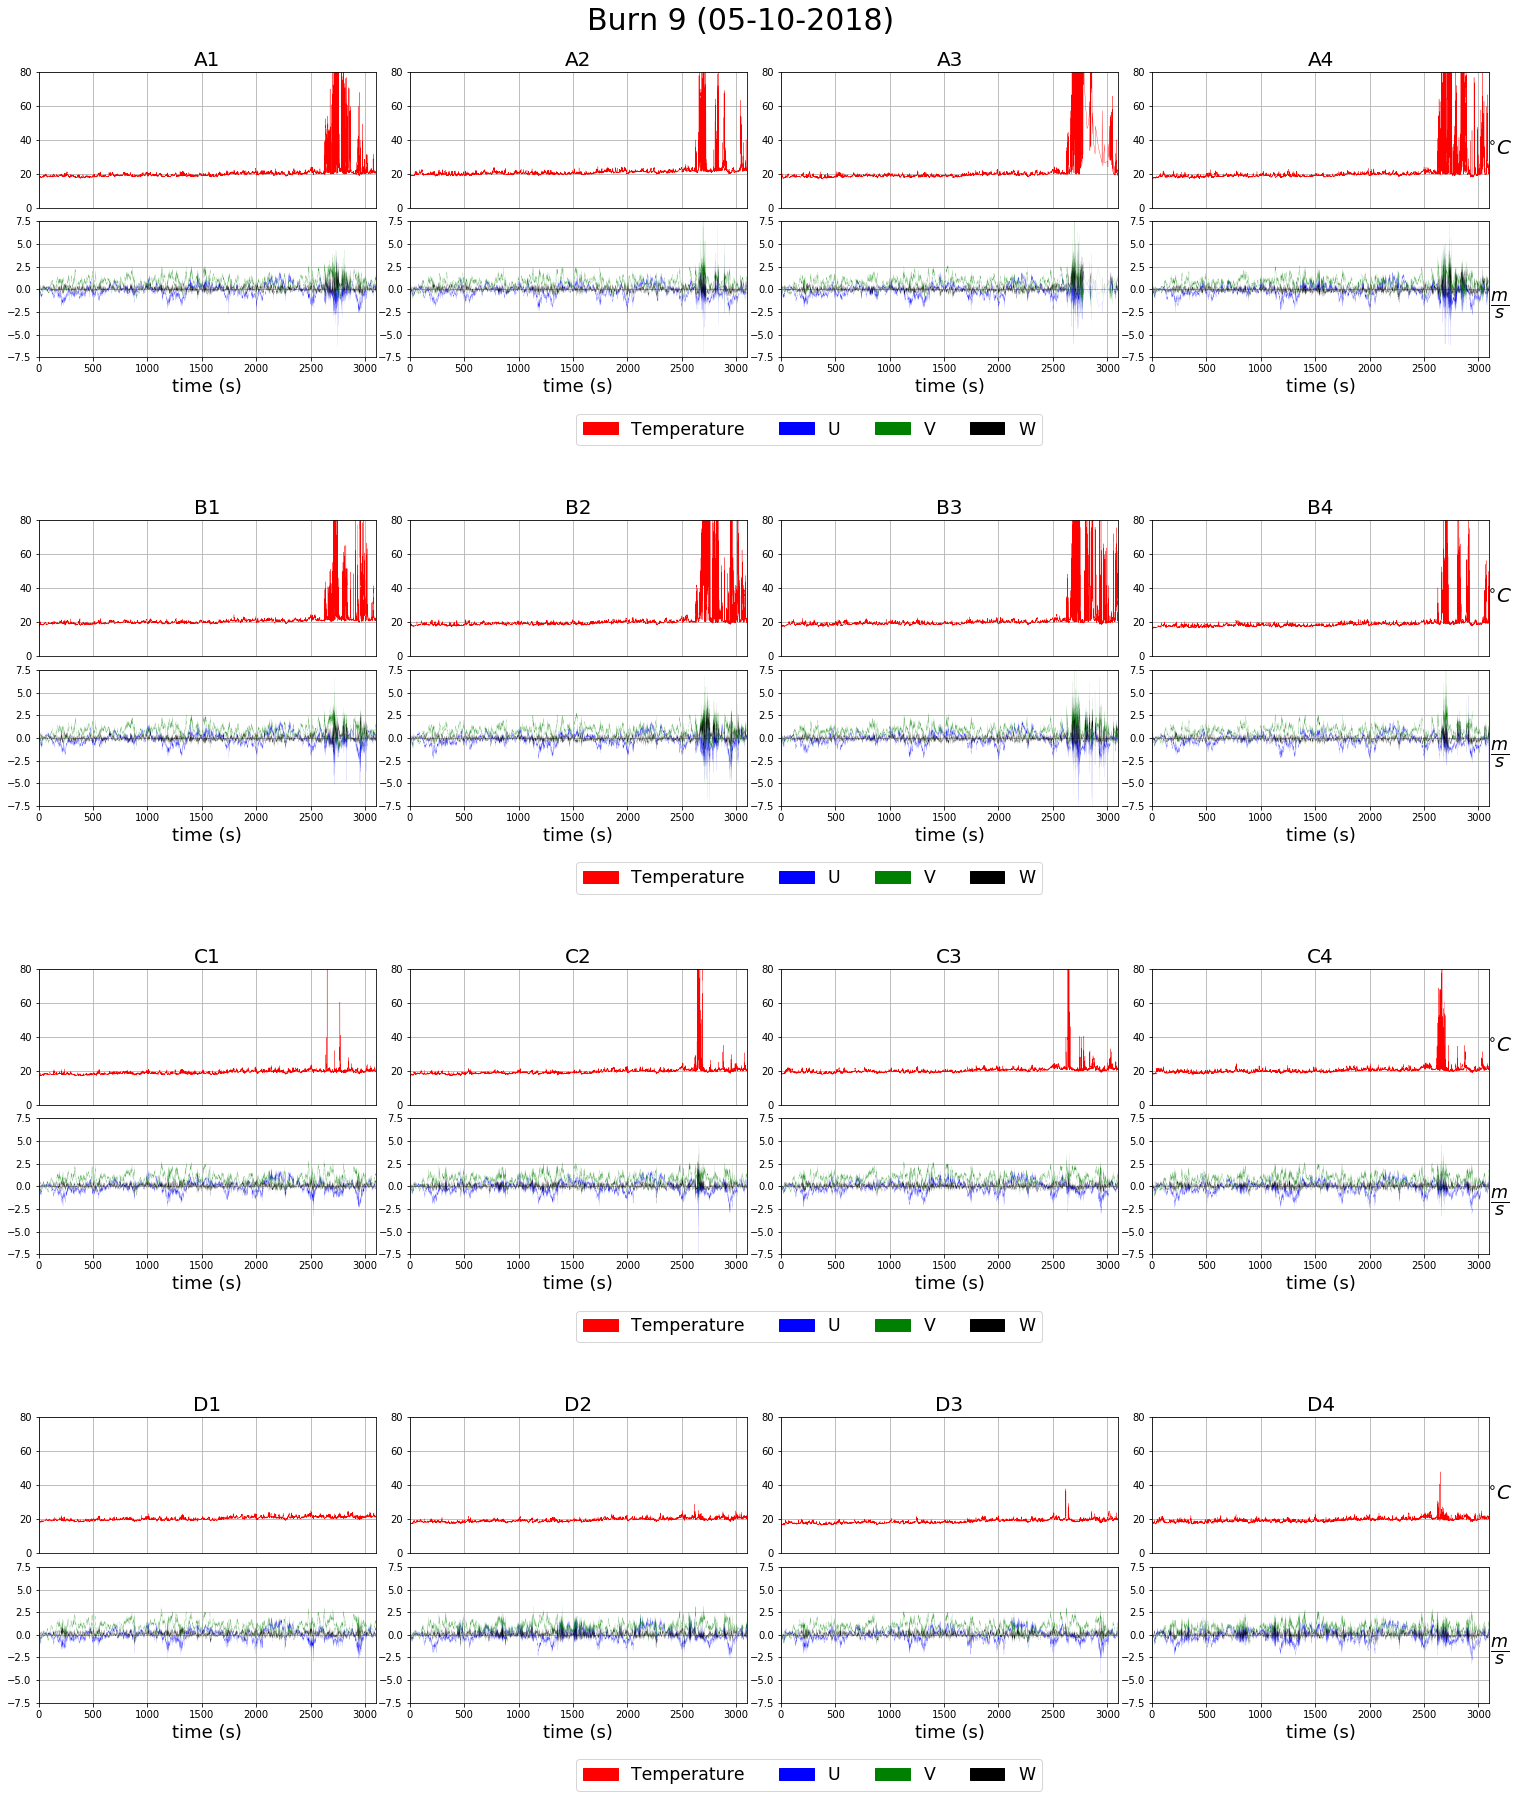

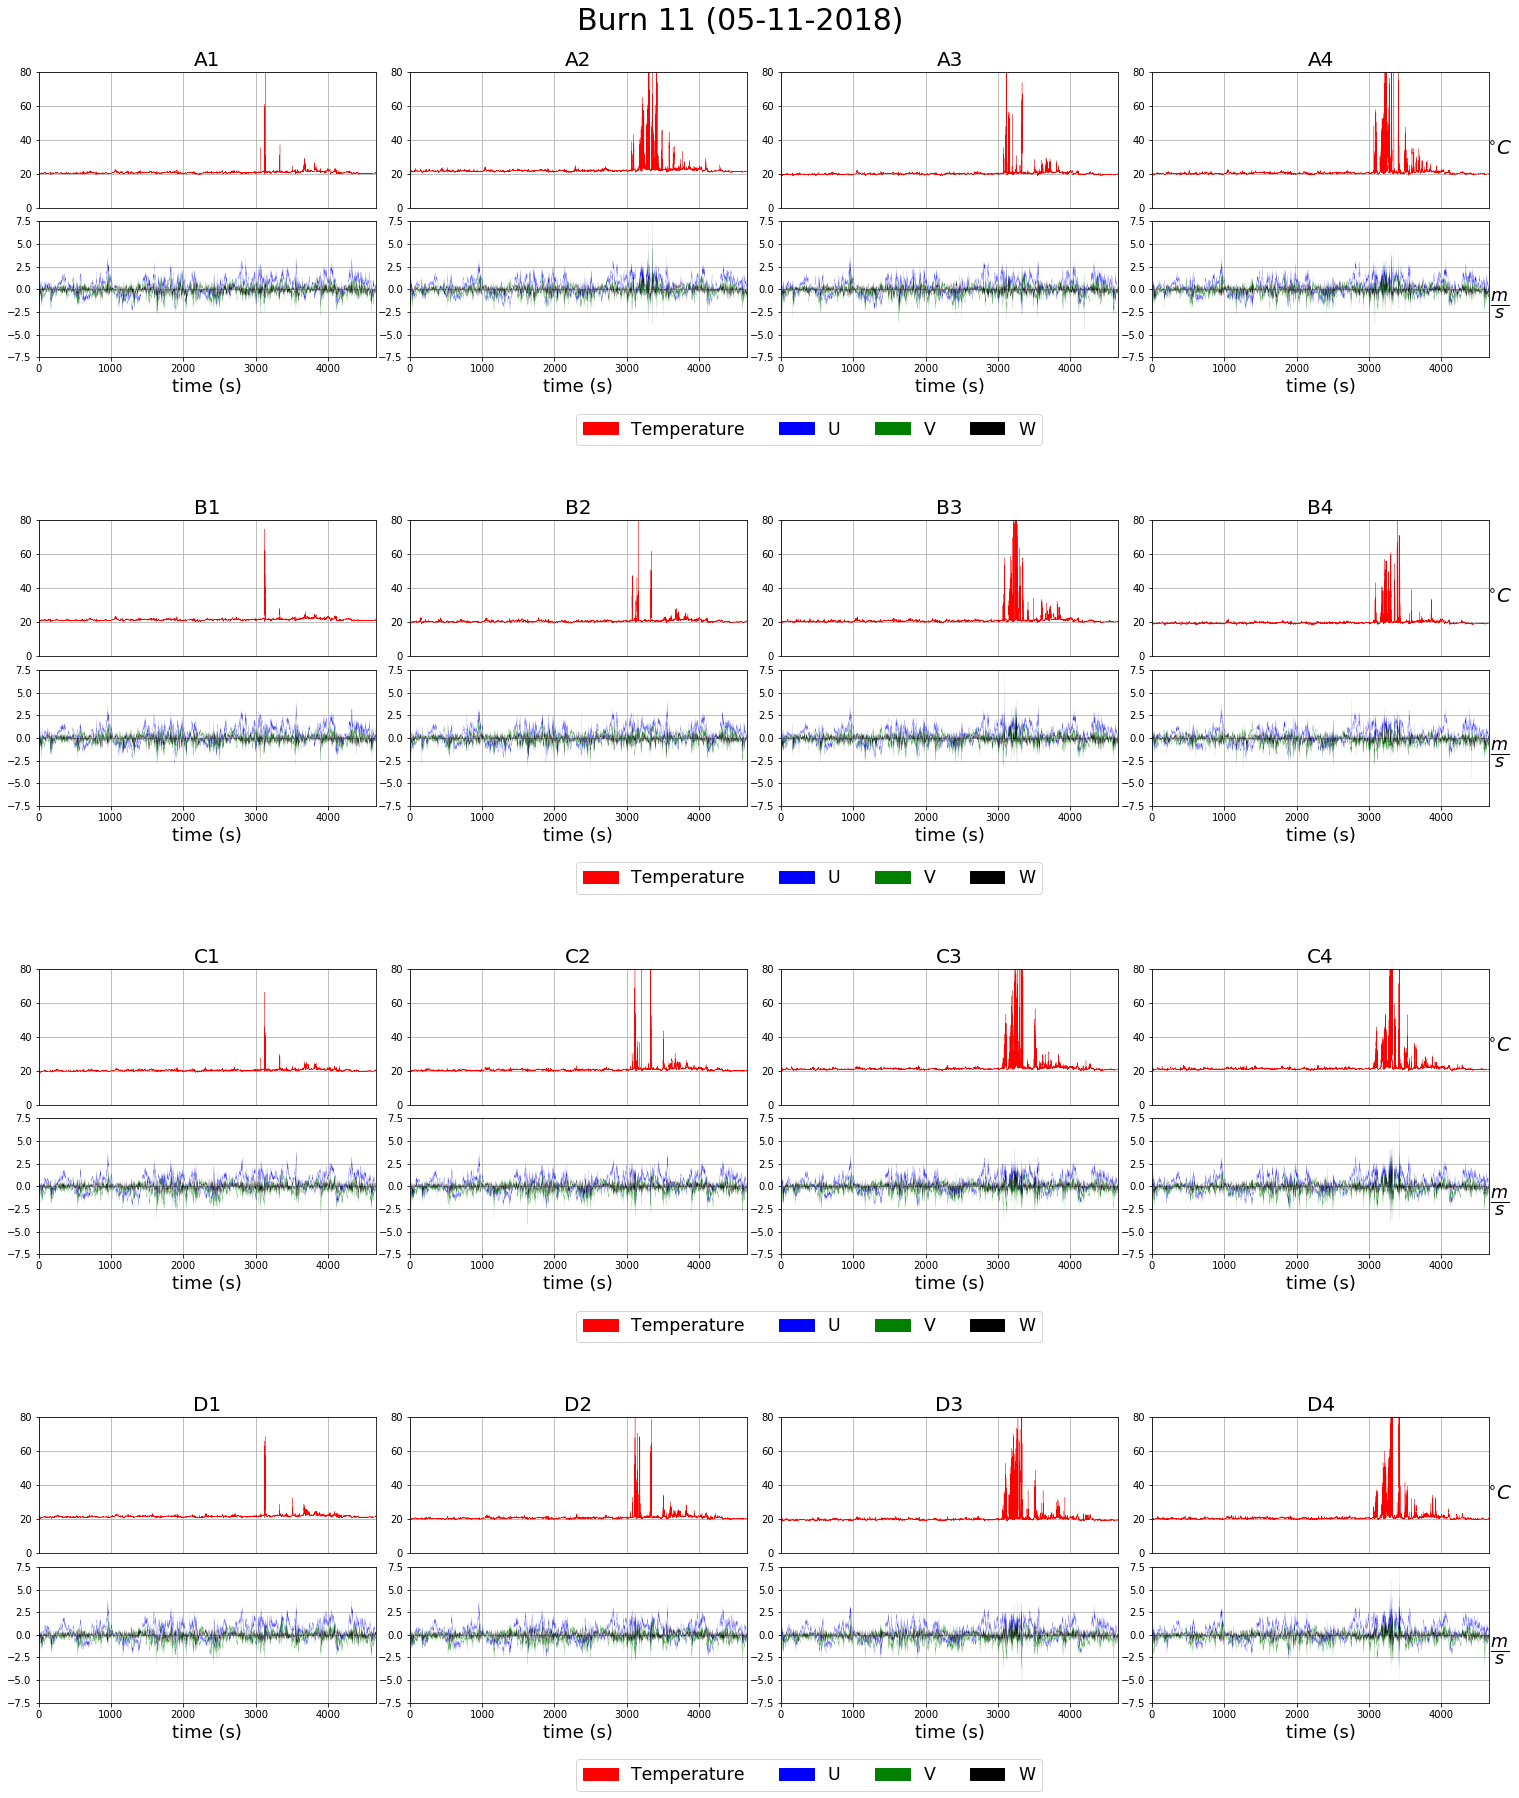

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:128: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


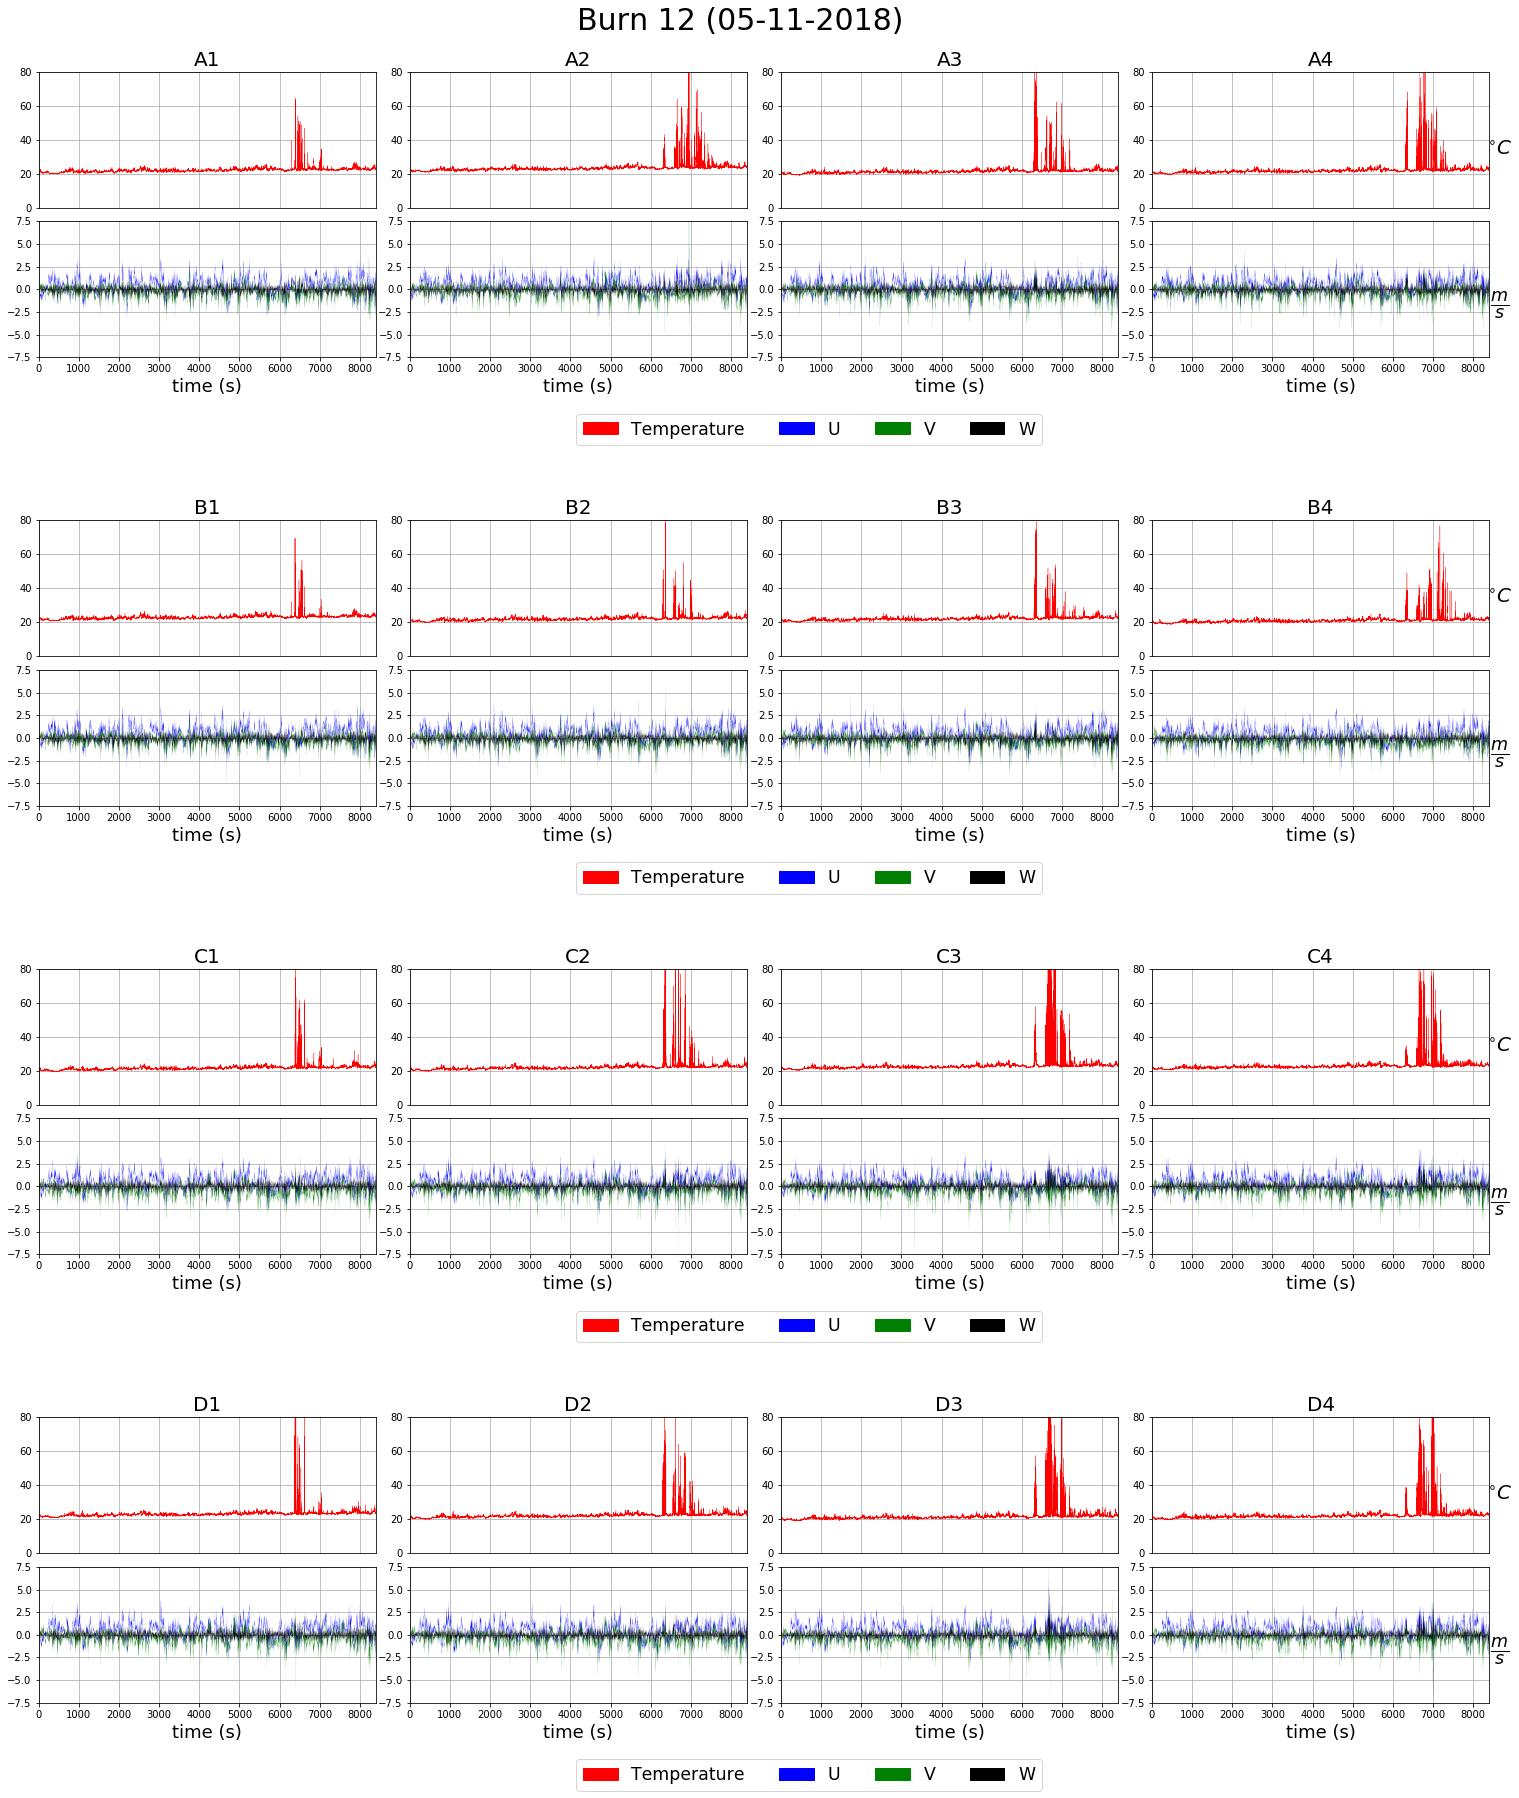

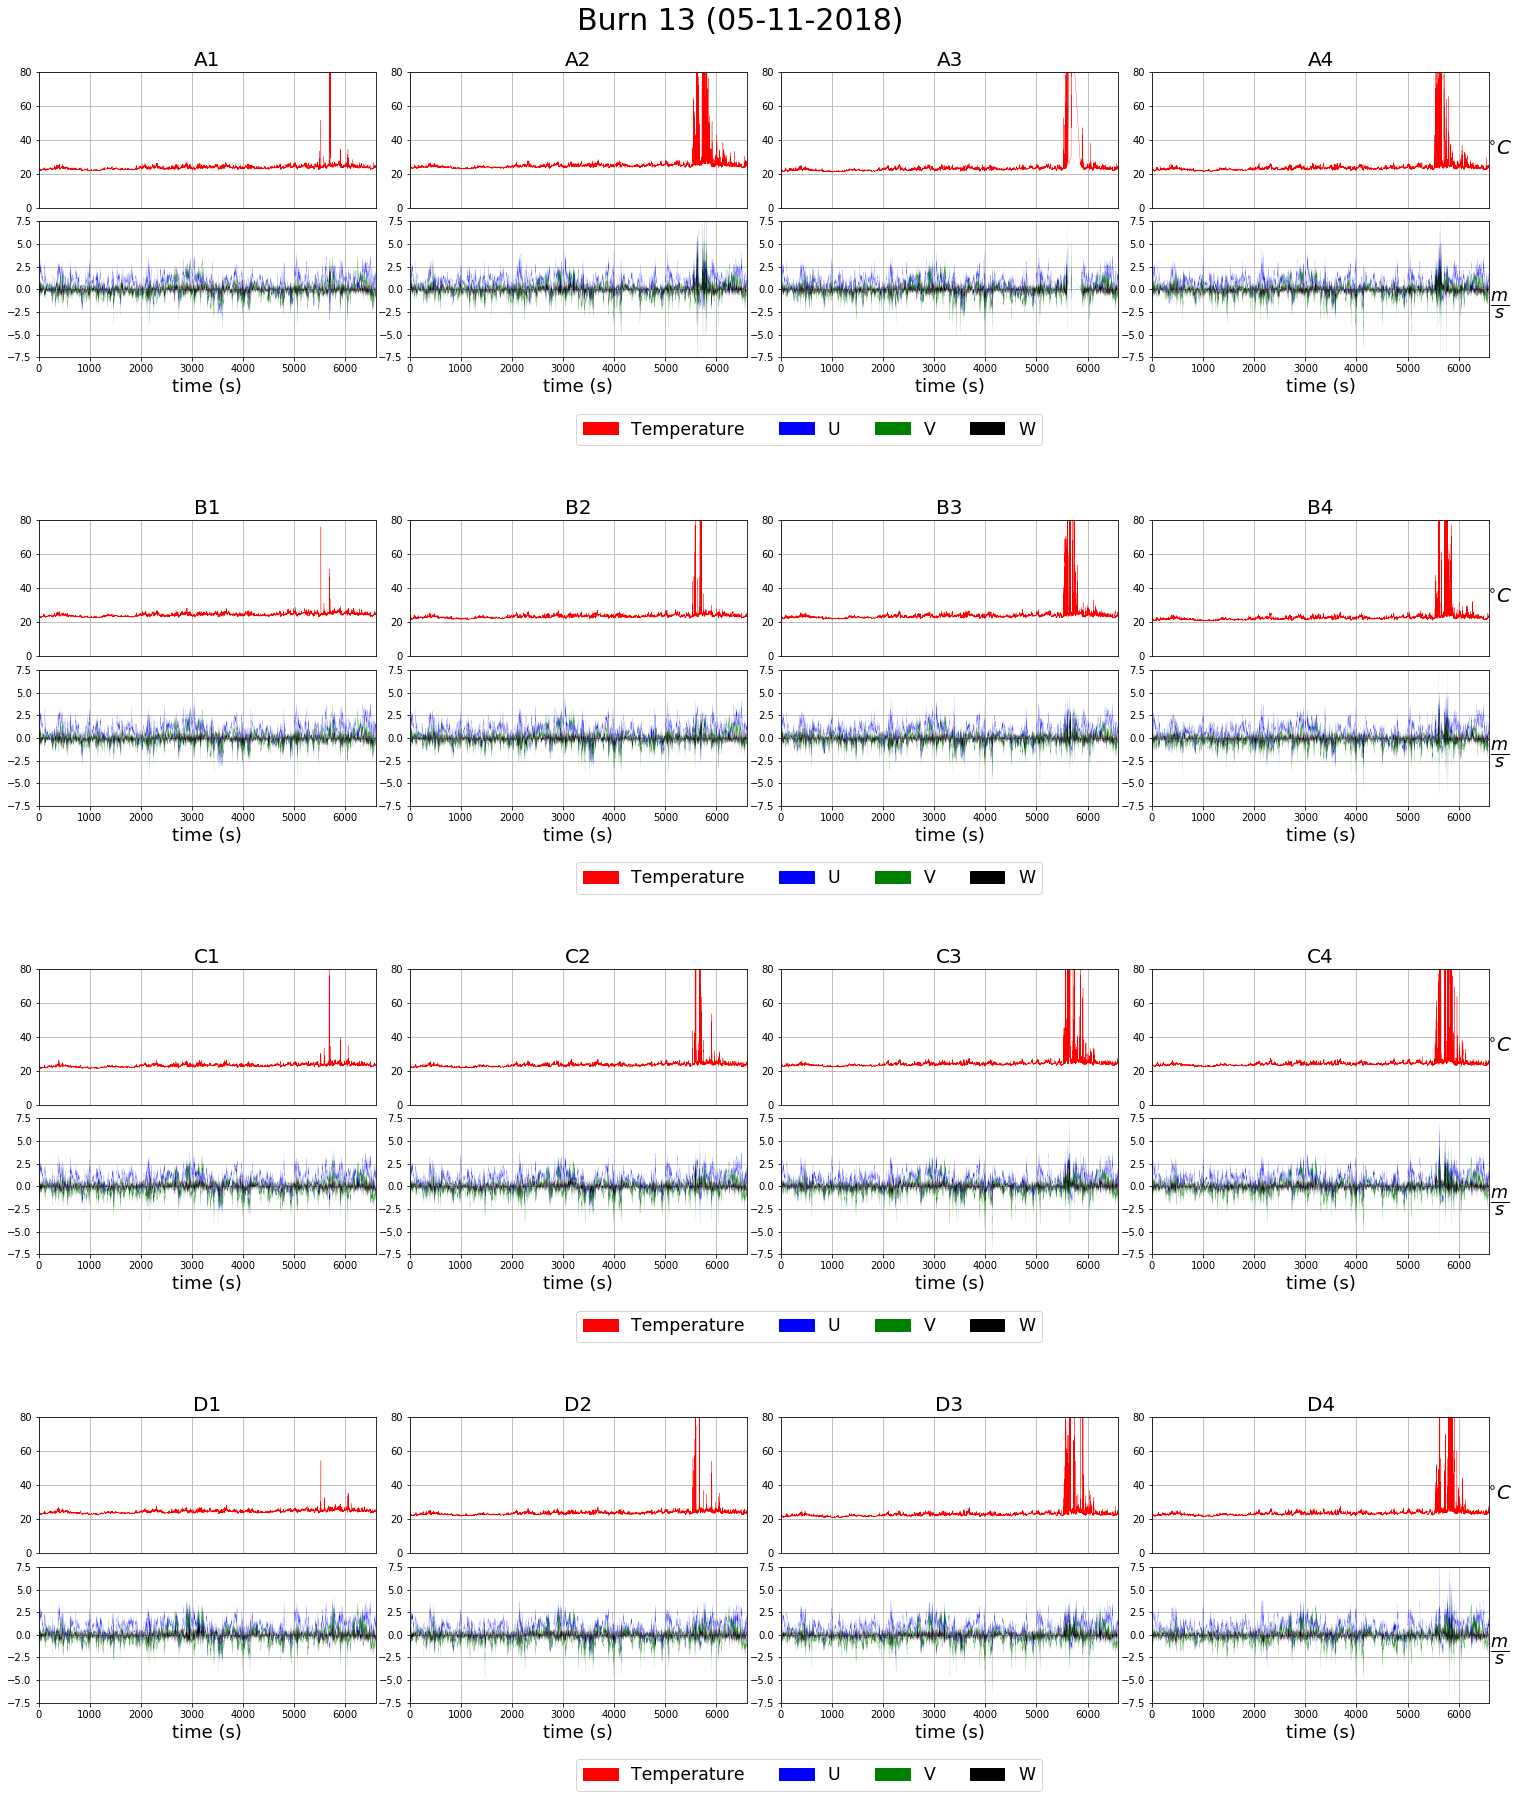

In [6]:
#path ="/home/joey/Desktop/10X10_Truss_SERDP_Burns_May_2018/JS_Cleaned_Data/Burn-"
path = "/Users/joeyp/Desktop/Forestry/10X10_Truss_SERDP_Burns_May_2018/JS_Cleaned_Data/Burn-"
b=[9,11,12,13]
pat ='/sonics/'
for i in b:
    plotting(path+str(i)+pat,str(i))